In [1]:
import numpy as np
import pandas as pd

# data
plane = pd.read_csv("data/Airplane_Price_Prediction.csv")
plane.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


### 1 Data Exploration and Visualization

In [2]:
plane.shape

(517, 16)

In [3]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

Some columns (e.g., Max speed Knots, Rcmnd cruise Knots,..) contains some missing values

##### 1.1 Numerical Attributes Exploration

In [4]:
plane['Fuel gal/lbs'] = plane["Fuel gal/lbs"].astype('float64')
plane.dtypes

Model Name                  object
Engine Type                 object
HP or lbs thr ea engine     object
Max speed Knots             object
Rcmnd cruise Knots         float64
Stall Knots dirty          float64
Fuel gal/lbs               float64
All eng rate of climb       object
Eng out rate of climb      float64
Takeoff over 50ft          float64
Landing over 50ft           object
Empty weight lbs            object
Length ft/in                object
Wing span ft/in             object
Range N.M.                  object
Price                      float64
dtype: object

In [5]:
plane.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


The Fuel gal/lbs attribute has the highest standard deviation

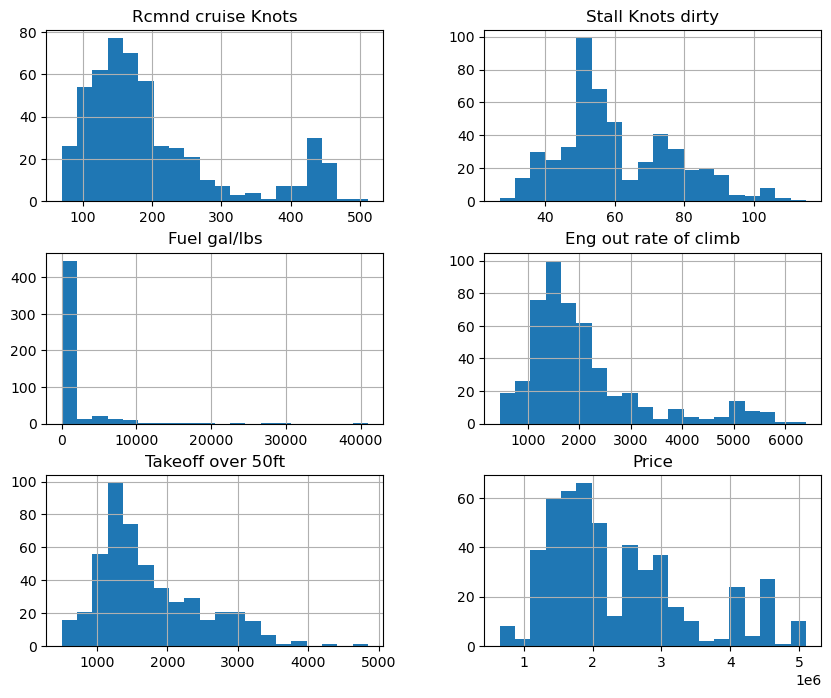

In [6]:
import matplotlib.pyplot as plt

# visualize the numerical columns
plane.hist(bins=20, figsize=(10,8))
plt.show()

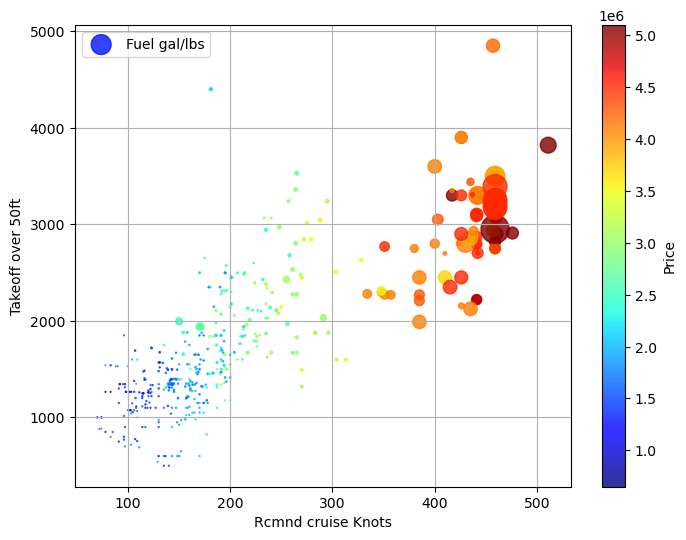

In [7]:
# scatter plot between Rcmnd cruise Knots and the target column (Price)

plane.plot(
    kind="scatter", x="Rcmnd cruise Knots", y="Takeoff over 50ft", grid=True, alpha=0.8, cmap="jet", s=plane["Fuel gal/lbs"]/100, 
    label="Fuel gal/lbs", c="Price", colorbar=True, legend=True, sharex=False, figsize=(8,6)
)
plt.show()

Here the red color circles represent price is higher prices, and blue circles represent lower prices. Larger circles indicate higher volume of fuel measured in gallons and its weight measured in pounds.

In [8]:
# corrleation of numerical features with the target

corr_matrix = plane.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                    1.000000
Rcmnd cruise Knots       0.949552
Stall Knots dirty        0.848191
Takeoff over 50ft        0.795469
Eng out rate of climb    0.792932
Fuel gal/lbs             0.607639
Name: Price, dtype: float64

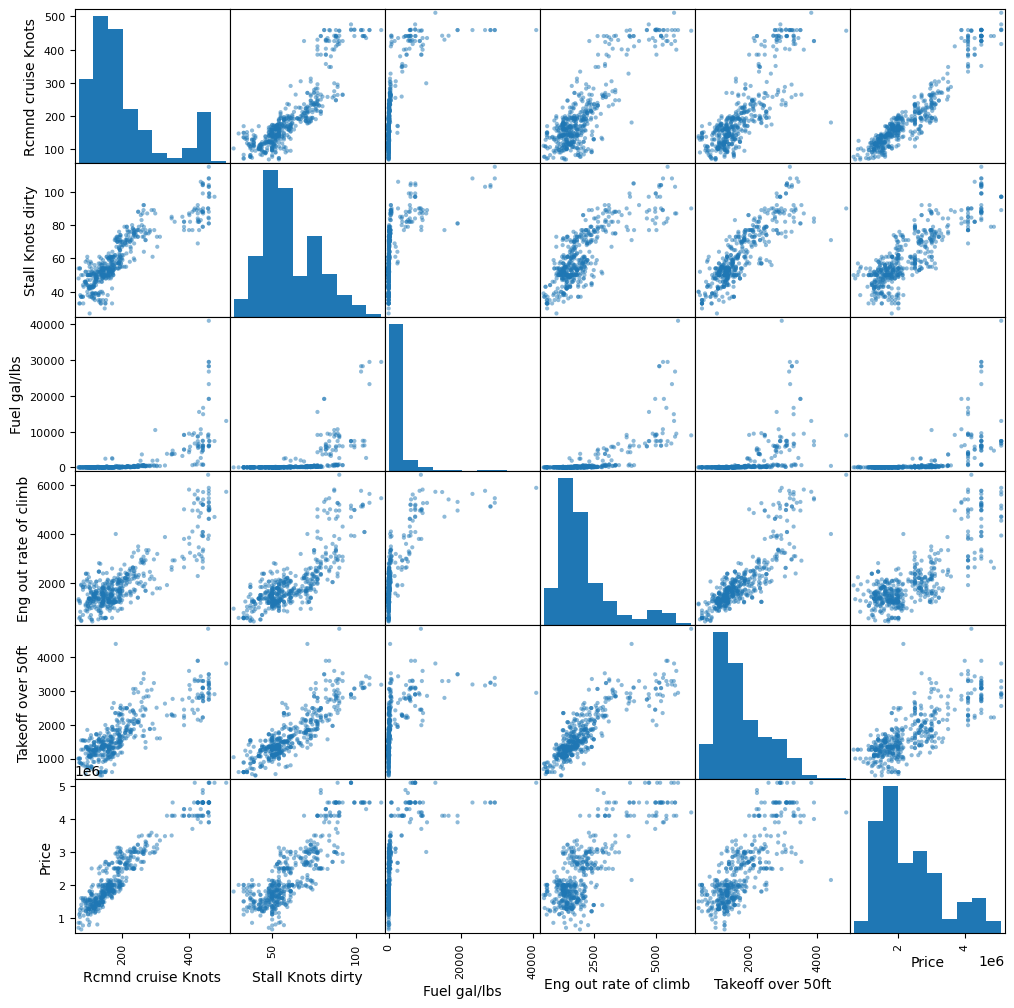

In [9]:
from pandas.plotting import scatter_matrix

# Visualize the correlation
plane_numerical = plane.select_dtypes(include=[np.number])
scatter_matrix(plane_numerical, figsize=(12, 12))
plt.show()

Seems 'Rcmnd cruise Knots' attribute will be most promising attribute to predict the airple price, need to zoom it.

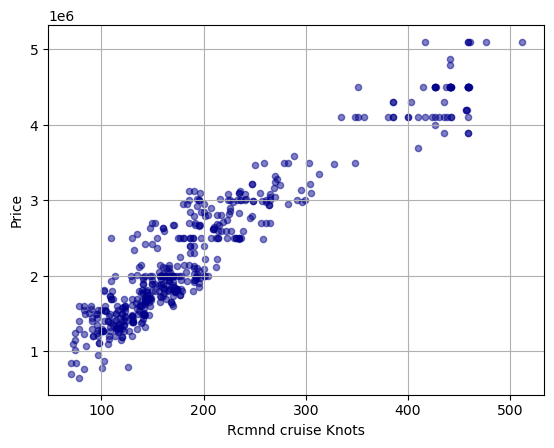

In [10]:
plane.plot(kind="scatter", x="Rcmnd cruise Knots", y="Price",c='DarkBlue', alpha=0.5, grid=True)
plt.show()

The plot revels 'Rcmnd cruise Knots' is strongly correlate with 'Price'

##### 1.2 Categorical Attributes Exploration

In [11]:
plane_categorical = plane.select_dtypes(include=["object"])
plane_categorical.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,All eng rate of climb,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.
0,100 Darter (S.L. Industries),Piston,145,104,450,"2,050","1,180",25/3,37/5,370
1,7 CCM Champ,Piston,85,89,600,"1,350",820,20/7,36/1,190
2,100 Darter (S.L. Industries),Piston,90,90,650,"1,300",810,21/5,35/0,210
3,7 AC Champ,Piston,85,88,620,"1,300",800,21/5,35/0,210
4,100 Darter (S.L. Industries),Piston,65,83,370,"1,220",740,21/5,35/0,175


In [12]:
# Model name variations
model_name_variations = plane_categorical["Model Name"].value_counts()
model_name_variations

100 Darter (S.L. Industries)                      234
GII (G1159) with tip tanks                          1
1121 Jet Commander                                  1
1123 Commodore Jet                                  1
1124A Westwind 2                                    1
                                                 ... 
210 F Centurion                                     1
T 207 (Stationair 7 & 8) '77=eng 310 hp             1
U206E,F, float ('75-'76 specs) '76=+4 gal fuel      1
TU 206E,F (ski) (prior'76=4 gal more fuel)          1
2150A Kachina                                       1
Name: Model Name, Length: 284, dtype: int64

In [13]:
len(model_name_variations)

284

The 'Model Name' attribute looks suspicious, need to do more analysis to figure out whether this attribute is important or not.

In [14]:
model_name_test = pd.get_dummies(plane_categorical["Model Name"])
model_name_test.head()

,100 Darter (S.L. Industries),100 King Air,1000 Jet Prop,108-1,108-3,112,1121 Jet Commander,1123 Commodore Jet,1124A Westwind 2,112B,...,TurboStream (Cessna 310 & 320 conv) 310hp,Twin Star Diamond DA42,U 206 A,"U206 E,F (ski) Super Skywagon","U206 F,G II ('75 up) '75 lgt=28/9 + prior'79 less fuel)","U206E,F, float ('75-'76 specs) '76=+4 gal fuel",V 35 TC Turbo Bonanza,V 35B Bonanza ('80 & up=fuel std 74 gal),Vision Jet SF50,XL2
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# look at the correlation with the price

model_name_test_with_price = pd.merge(model_name_test, plane[['Price']], left_index=True, right_index=True, how='left')
model_name_test_with_price.head()

,100 Darter (S.L. Industries),100 King Air,1000 Jet Prop,108-1,108-3,112,1121 Jet Commander,1123 Commodore Jet,1124A Westwind 2,112B,...,Twin Star Diamond DA42,U 206 A,"U206 E,F (ski) Super Skywagon","U206 F,G II ('75 up) '75 lgt=28/9 + prior'79 less fuel)","U206E,F, float ('75-'76 specs) '76=+4 gal fuel",V 35 TC Turbo Bonanza,V 35B Bonanza ('80 & up=fuel std 74 gal),Vision Jet SF50,XL2,Price
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1300000.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1230000.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1600000.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1300000.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1250000.0


In [16]:
model_name_corr = model_name_test_with_price.corr()
model_name_corr["Price"].sort_values(ascending=False)

Price                                      1.00000
PA-30 B Turbo Twin Comanche                0.11957
402,-A turbocharged                        0.11957
402C Business Liner II                     0.11957
208 Caravan-675                            0.11957
                                            ...   
G164A-245 AG CAT                               NaN
G164A-300 AG CAT                               NaN
PA-18 150 Super Cub                            NaN
PA-36-375 Brave (spray restr. category)        NaN
T 210 F Turbo Centurion                        NaN
Name: Price, Length: 285, dtype: float64

Model Name is not providing so much information, and it can be different for new (unseen) data if the model deployed in web service. So, we can drop this from the datset.

In [17]:
plane.drop(columns='Model Name', inplace=True)
plane.head()

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,Piston,145,104,91.0,46.0,36.0,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,Piston,85,89,83.0,44.0,15.0,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,Piston,90,90,78.0,37.0,19.0,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,Piston,85,88,78.0,37.0,19.0,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,Piston,65,83,74.0,33.0,14.0,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [18]:
plane_categorical["Engine Type"].value_counts()

Piston     384
Jet         74
Propjet     58
piston       1
Name: Engine Type, dtype: int64

Here 'piston' will be 'Piston', it might happened for typose.

In [19]:
plane["Engine Type"] = plane["Engine Type"].replace({'piston': 'Piston'})

Explore other categorical data

In [20]:
plane_categorical["Length ft/in"].value_counts()

25/1     17
27/3     13
35/6     11
28/3     11
25/6     10
         ..
20/10     1
46/1      1
46/8      1
43/10     1
34/8      1
Name: Length ft/in, Length: 183, dtype: int64

In [21]:
plane_categorical["Wing span ft/in"].value_counts()

35/10    34
32/9     23
35/0     16
36/9     16
36/0     15
         ..
29/11     1
56        1
35/5      1
47/11     1
41/1      1
Name: Wing span ft/in, Length: 136, dtype: int64

In [22]:
def find_irregular_values(dataframe, column_name):
    regex_pattern = r'\d+/\d+'
    filter_condition = dataframe[column_name].str.contains(regex_pattern, regex=True)
    irregular_values = dataframe.loc[~filter_condition, column_name]
    return irregular_values

In [23]:
find_irregular_values(plane_categorical, 'Length ft/in')

14     3,150
405      N/C
406      N/C
453     Orig
Name: Length ft/in, dtype: object

In [24]:
length_replacement = {
    '3,150' : '3/150',
    'N/C' : '0/0',
    'Orig' : '0/0'
}

plane['Length ft/in'] = plane['Length ft/in'].replace(length_replacement)
find_irregular_values(plane, 'Length ft/in')

Series([], Name: Length ft/in, dtype: object)

In [25]:
find_irregular_values(plane_categorical, 'Wing span ft/in')

46       56
241      36
364      36
405     N/C
406     N/C
419      28
453    Orig
455    32.9
Name: Wing span ft/in, dtype: object

In [26]:
length_replacement = {
    '56' : '56/0',
    '36' : '36/0',
    '28' : '28/0',
    'N/C' : '0/0',
    'Orig' : '0/0',
    '32.9' : '32/9'
}

plane['Wing span ft/in'] = plane['Wing span ft/in'].replace(length_replacement)
find_irregular_values(plane, 'Wing span ft/in')

Series([], Name: Wing span ft/in, dtype: object)

Need to convert these two attributes value into one unit (e.g., meter)

In [27]:
# spliting the column like a/b into two columns a(feet) and b(inches)
plane[['Feet_length', 'Inches_length']] = plane['Length ft/in'].str.split('/', expand=True).astype(float)
plane[['Feet_wing', 'Inches_wing']] = plane['Wing span ft/in'].str.split('/', expand=True).astype(float)

In [28]:
# dropping these columns
plane.drop(columns=["Length ft/in", "Wing span ft/in"], inplace=True)

In [29]:
# Conversion factor: 1 foot = 0.3048 meters, 1 inch = 0.0254 meters
plane['length_meters'] = plane['Feet_length'] * 0.3048 + plane['Inches_length'] * 0.0254
plane['Wing_span_meters'] = plane['Feet_wing'] * 0.3048 + plane['Inches_wing'] * 0.0254

In [30]:
plane.drop(columns=["Feet_length","Inches_length","Feet_wing", "Inches_wing"], inplace=True)
plane.head()

,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Range N.M.,Price,length_meters,Wing_span_meters
0,Piston,145,104,91.0,46.0,36.0,450,900.0,1300.0,"2,050","1,180",370,1300000.0,7.6962,11.4046
1,Piston,85,89,83.0,44.0,15.0,600,720.0,800.0,"1,350",820,190,1230000.0,6.2738,10.9982
2,Piston,90,90,78.0,37.0,19.0,650,475.0,850.0,"1,300",810,210,1600000.0,6.5278,10.6680
3,Piston,85,88,78.0,37.0,19.0,620,500.0,850.0,"1,300",800,210,1300000.0,6.5278,10.6680
4,Piston,65,83,74.0,33.0,14.0,370,632.0,885.0,"1,220",740,175,1250000.0,6.5278,10.6680


In [31]:
plane["Price"].iloc[47]

3480000.0

In [32]:
import re

attributes_to_be_converted_into_float = ["HP or lbs thr ea engine", "Max speed Knots", "All eng rate of climb", 
                                       "Landing over 50ft", "Empty weight lbs", "Range N.M."]

for attribute in attributes_to_be_converted_into_float:
    # Use a regular expression to extract numbers from the string
    plane[attribute] = plane[attribute].apply(lambda x: pd.to_numeric(re.sub(r'[^0-9.]', '', str(x)), errors='coerce'))

In [33]:
# correlation
plane.corr()["Price"].sort_values(ascending=False)

Price                      1.000000
Rcmnd cruise Knots         0.949552
Stall Knots dirty          0.848191
Max speed Knots            0.839381
length_meters              0.803962
Takeoff over 50ft          0.795469
Eng out rate of climb      0.792932
Range N.M.                 0.750394
All eng rate of climb      0.723730
Empty weight lbs           0.692041
Landing over 50ft          0.685806
HP or lbs thr ea engine    0.673969
Fuel gal/lbs               0.607639
Wing_span_meters           0.584073
Name: Price, dtype: float64

### 2 Feature Engineering

Does not seem any attribute needs to be merged with other attribute, so directly moving to the next step.

### 3 Data Cleaning and Preprocessing

So far, plane dataset has one categorical attribute (Engine Type) and others are numerical attributes

In [34]:
plane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Type              517 non-null    object 
 1   HP or lbs thr ea engine  517 non-null    int64  
 2   Max speed Knots          497 non-null    float64
 3   Rcmnd cruise Knots       507 non-null    float64
 4   Stall Knots dirty        502 non-null    float64
 5   Fuel gal/lbs             517 non-null    float64
 6   All eng rate of climb    513 non-null    float64
 7   Eng out rate of climb    491 non-null    float64
 8   Takeoff over 50ft        492 non-null    float64
 9   Landing over 50ft        516 non-null    float64
 10  Empty weight lbs         516 non-null    float64
 11  Range N.M.               499 non-null    float64
 12  Price                    507 non-null    float64
 13  length_meters            517 non-null    float64
 14  Wing_span_meters         5

In [35]:
plane['HP or lbs thr ea engine'] = plane["HP or lbs thr ea engine"].astype('float64')

##### 3.1 Data Split Into Train and Test

In [36]:
# Find the stratified sampling attribute
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")

test = plane[["Engine Type", "Price"]]
encoded_test = encoder.fit_transform(test[["Engine Type"]]).toarray()

encoded_test_df = pd.DataFrame(encoded_test, columns= encoder.get_feature_names_out(), index = test.index)
encoded_test_df = pd.merge(encoded_test_df, test["Price"], left_index=True, right_index=True, how="left")
encoded_test_df.head()

,Engine Type_Jet,Engine Type_Piston,Engine Type_Propjet,Price
0,0.0,1.0,0.0,1300000.0
1,0.0,1.0,0.0,1230000.0
2,0.0,1.0,0.0,1600000.0
3,0.0,1.0,0.0,1300000.0
4,0.0,1.0,0.0,1250000.0


In [37]:
encoded_test_df.corr()["Price"].sort_values(ascending=False)

Price                  1.000000
Engine Type_Jet        0.789784
Engine Type_Propjet    0.214199
Engine Type_Piston    -0.785810
Name: Price, dtype: float64

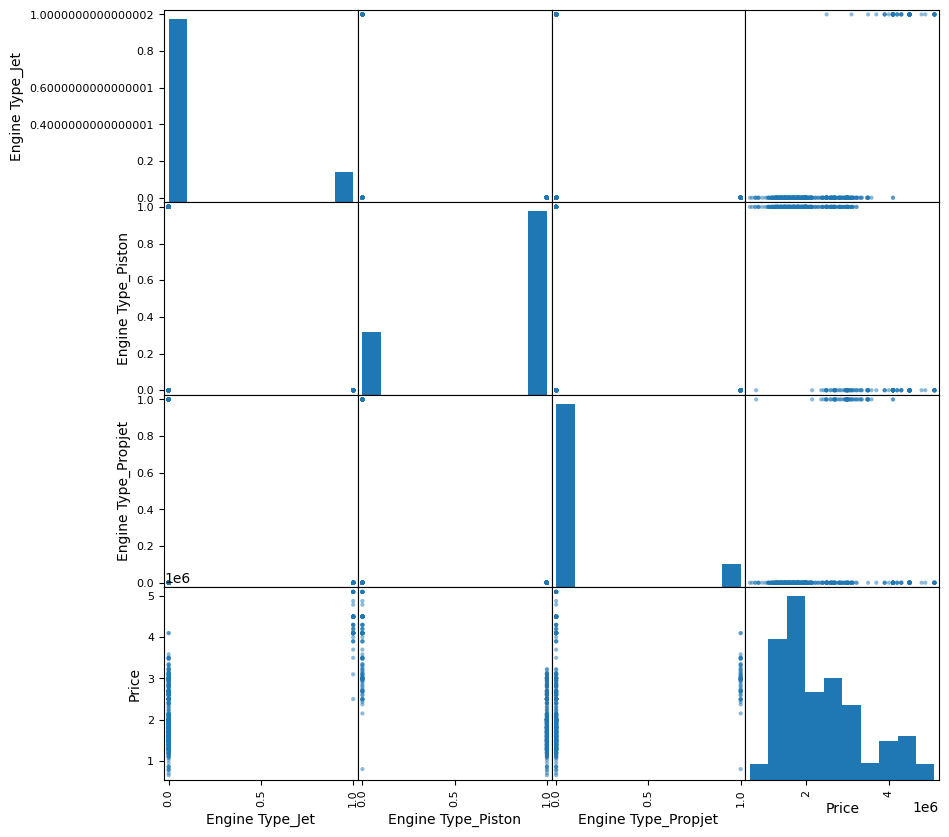

In [38]:
# Visualize the correlation
scatter_matrix(encoded_test_df, figsize=(10, 10))
plt.show()

It will not be a good idea to do stratified sampling based on 'Engine Type' attribute

In [39]:
from sklearn.model_selection import train_test_split

X_plane = plane.drop(columns=["Price"], axis=1)
y_plane = plane["Price"].copy()

X_train, X_test, y_train, y_test = train_test_split(X_plane, y_plane, test_size=0.2, random_state=42)

print(f"Train size:({len(X_train)},{len(y_train)})")
print(f"Test size:({len(X_test)},{len(y_test)})")

Train size:(413,413)
Test size:(104,104)


##### 3.2 Handle categorical and numerical variables

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn import set_config

# pipeline for numerical attributes
numerical_pipeline = make_pipeline(
    KNNImputer(n_neighbors=7), 
    StandardScaler()
)

# pipeline for categorical attributes
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# apply pipeline for both attributes
preprocessing = make_column_transformer(
    (numerical_pipeline, make_column_selector(dtype_include=[np.number])),
    (categorical_pipeline, make_column_selector(dtype_include=object))
)

# spilit data
plane_train, plane_test = train_test_split(plane, test_size=0.2, random_state=42)

plane_train_preprocessed = preprocessing.fit_transform(plane_train)

# convert the output into pandas DataFrame
plane_train_preprocessed_df = pd.DataFrame(
    plane_train_preprocessed, columns=preprocessing.get_feature_names_out(), index=plane_train.index
)
plane_train_preprocessed_df.head()

,pipeline-1__HP or lbs thr ea engine,pipeline-1__Max speed Knots,pipeline-1__Rcmnd cruise Knots,pipeline-1__Stall Knots dirty,pipeline-1__Fuel gal/lbs,pipeline-1__All eng rate of climb,pipeline-1__Eng out rate of climb,pipeline-1__Takeoff over 50ft,pipeline-1__Landing over 50ft,pipeline-1__Empty weight lbs,pipeline-1__Range N.M.,pipeline-1__Price,pipeline-1__length_meters,pipeline-1__Wing_span_meters,pipeline-2__Engine Type_Jet,pipeline-2__Engine Type_Piston,pipeline-2__Engine Type_Propjet
329,-0.393020,-0.763333,-0.772185,-0.771859,-0.322410,-0.741514,-0.346835,-0.543098,-0.477667,-0.508811,-0.637408,-0.654492,-0.435436,-0.349364,0.0,1.0,0.0
173,1.060519,2.454930,2.058563,1.618765,-0.146975,3.568549,0.726094,1.421859,0.466153,0.392368,0.084481,1.683289,0.895260,-0.404851,1.0,0.0,0.0
272,-0.335859,-0.516452,-0.584096,-0.480319,-0.319917,-0.575209,-0.243834,-0.536391,-0.378068,-0.454430,-0.527406,-0.868788,-0.367195,-0.293876,0.0,1.0,0.0
497,-0.382132,-0.340109,-0.386602,-0.655243,-0.322864,-0.443551,-0.681589,-0.502860,-0.475296,-0.492411,-0.464155,-0.479158,-0.742520,-0.469587,0.0,1.0,0.0
182,1.080662,-1.841671,1.851664,1.443842,0.766919,1.001221,1.292600,1.931540,0.684323,0.776491,1.322005,2.001950,1.222816,1.435499,1.0,0.0,0.0


In [41]:
plane_train_preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 329 to 102
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   pipeline-1__HP or lbs thr ea engine  413 non-null    float64
 1   pipeline-1__Max speed Knots          413 non-null    float64
 2   pipeline-1__Rcmnd cruise Knots       413 non-null    float64
 3   pipeline-1__Stall Knots dirty        413 non-null    float64
 4   pipeline-1__Fuel gal/lbs             413 non-null    float64
 5   pipeline-1__All eng rate of climb    413 non-null    float64
 6   pipeline-1__Eng out rate of climb    413 non-null    float64
 7   pipeline-1__Takeoff over 50ft        413 non-null    float64
 8   pipeline-1__Landing over 50ft        413 non-null    float64
 9   pipeline-1__Empty weight lbs         413 non-null    float64
 10  pipeline-1__Range N.M.               413 non-null    float64
 11  pipeline-1__Price             

In [42]:
# Imputing train target data
y_train.fillna(plane["Price"].median(), inplace=True)

### 4 Model Selection,Training, and Evaluation on Training Data

##### 4.1 Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B74F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B7430>)])),
                ('linearregression', LinearRegression())])

In [44]:
from sklearn.metrics import mean_squared_error

lin_reg_predictions = lin_reg.predict(X_train)
lin_reg_rmse = mean_squared_error(y_train, lin_reg_predictions, squared=False)
lin_reg_rmse

335261.75661823066

This error clearly says that the model is underfitting that might happen because the data in not enough for this model or the data needs some powerfull model, so, let's see the learning curves first.

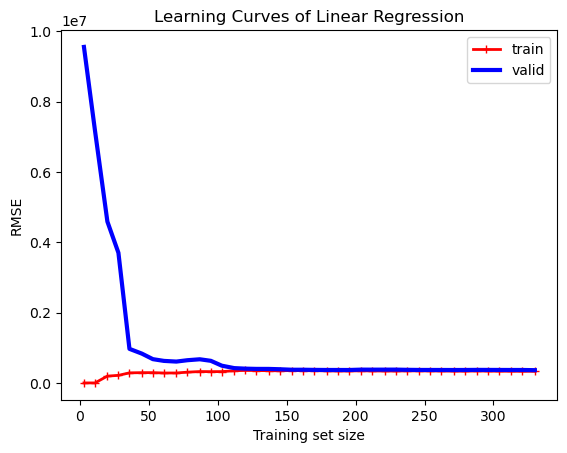

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "-b", linewidth=3, label="valid")

plt.title("Learning Curves of Linear Regression")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The model is overfitting here as the generated data is nonlinear, so normal LinearRegression does not just fit with the training data. If the model is underfitting, adding more instances will not help at all. We need to come up with an another model or better features.
Now let's 10-th degree polynomial model and see the learning curve.

#### 4.2 Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = make_pipeline(
    preprocessing, PolynomialFeatures(degree=2, include_bias=False), LinearRegression()
)

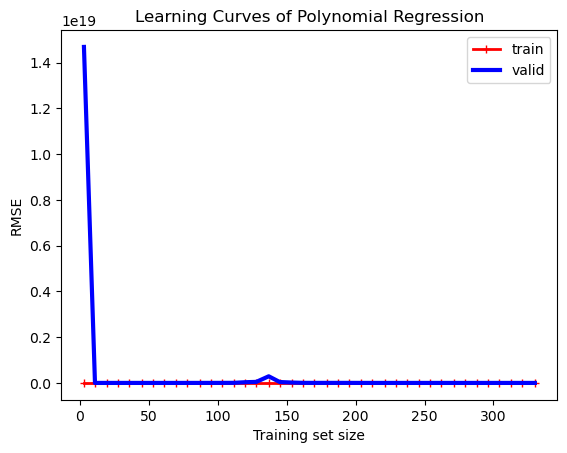

In [47]:
train_sizes, train_scores, valid_scores = learning_curve(
    poly_features, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

# Plotting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "-b", linewidth=3, label="valid")

plt.title("Learning Curves of Polynomial Regression")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The model is clearly overfitting, also it increased computational complexity. Apply regularization for linear regression models.

#### 4.3 Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

ridge_reg = make_pipeline(preprocessing, Ridge(alpha=0.1, solver="cholesky"))
ridge_reg.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B74F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B7430>)])),
                ('ridge', Ridge(alpha=0.1, solver='cholesky'))])

In [53]:
ridge_reg_predictions = ridge_reg.predict(X_train)
ridge_reg_rmse = mean_squared_error(y_train, lin_reg_predictions, squared=False)
ridge_reg_rmse

335261.75661823066

Varify the model using k-folds cross validation
##### Evaluation Using k-folds Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

ridge_reg_cross_val = - cross_val_score(ridge_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(ridge_reg_cross_val).describe()

count        10.000000
mean     357469.665957
std       64529.245283
min      258642.470956
25%      311735.102886
50%      367579.191359
75%      403616.345198
max      455486.478366
dtype: float64

Still the model's performace is not good enough
### 4.4 Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

lasso_reg = make_pipeline(preprocessing, Lasso(alpha=0.1, max_iter=10000))

lasso_reg_cross_val = - cross_val_score(lasso_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lasso_reg_cross_val).describe()

count        10.000000
mean     357973.415642
std       64663.829925
min      258742.022843
25%      311681.096518
50%      370077.280977
75%      403327.511038
max      456136.386143
dtype: float64

#### 4.5 Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B74F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B7430>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [60]:
tree_reg_predictions = tree_reg.predict(X_train)

tree_reg_rmse = mean_squared_error(y_train, tree_reg_predictions, squared=False)
tree_reg_rmse

0.0

Seems model is ovefitting, let's see the cross validation result.

In [61]:
tree_cross_val = - cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_cross_val).describe()

count        10.000000
mean     391748.829281
std       95267.064987
min      243564.735723
25%      328891.087660
50%      384833.367501
75%      471748.618394
max      519306.085537
dtype: float64

#### 4.6 Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
rf_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B74F0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B7430>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [63]:
rrf_regf_reg_predictions = tree_reg.predict(X_train)

rf_reg_rmse = mean_squared_error(y_train, tree_reg_predictions, squared=False)
rf_reg_rmse

0.0

In [64]:
tree_cross_val = - cross_val_score(rf_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_cross_val).describe()

count        10.000000
mean     316312.516884
std       75905.467878
min      225962.809574
25%      253324.258004
50%      305944.387337
75%      354898.490567
max      444743.279428
dtype: float64

Min error has decreased, let's save the best model before overfitting.

##### Early Stopping

In [71]:
from copy import deepcopy

# data split: train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.5)

best_valid_rmse = float('inf')
best_model = None

# early stropping 
for epoch in range(100):
    rf_reg.fit(X_train, y_train)
    y_valid_predict = rf_reg.predict(X_valid)
    valid_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if( valid_error < best_valid_rmse):
        best_valid_rmse = valid_error
        best_model = deepcopy(rf_reg)

In [74]:
random_forest = deepcopy(best_model)
random_forest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002723707D040>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002723707D8E0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

### 5 Fine-Tune Model
#### Randomized Search

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42))
    
])

param_distributions = {
    'random_forest__n_estimators': randint(low=50, high=300),
    'random_forest__max_depth': randint(low=10, high=50)
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distributions, n_iter=10, cv=3, 
    scoring='neg_root_mean_squared_error', random_state=42
)

rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('knnimputer',
                                                                                                KNNImputer(n_neighbors=7)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x000002722D9B74F0>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImp...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002723707D370>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002723707D400>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [89]:
# best perameters
rnd_search.best_params_

{'random_forest__max_depth': 30, 'random_forest__n_estimators': 152}

In [87]:
rnd_search_result = pd.DataFrame(rnd_search.cv_results_).sort_values(by="rank_test_score",ascending=False)
rnd_search_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.073711,0.005193,0.010106,0.000119,38,64,"{'random_forest__max_depth': 38, 'random_fores...",-95312.500000,-1.586406e+06,-2.425000e+06,-1.368906e+06,9.634454e+05,10
5,0.249585,0.006539,0.020046,0.000064,20,252,"{'random_forest__max_depth': 20, 'random_fores...",-38968.253968,-1.613095e+06,-2.437619e+06,-1.363228e+06,9.950567e+05,9
0,0.250539,0.020715,0.013115,0.004656,48,229,"{'random_forest__max_depth': 48, 'random_fores...",-32052.401747,-1.614192e+06,-2.441179e+06,-1.362475e+06,9.994979e+05,8
8,0.184076,0.011287,0.014680,0.004227,33,180,"{'random_forest__max_depth': 33, 'random_fores...",-29222.222222,-1.604722e+06,-2.446000e+06,-1.359981e+06,1.001708e+06,7
4,0.276697,0.026305,0.014099,0.005911,28,264,"{'random_forest__max_depth': 28, 'random_fores...",-40075.757576,-1.607386e+06,-2.430000e+06,-1.359154e+06,9.913455e+05,6
2,0.246097,0.014302,0.019646,0.000513,17,238,"{'random_forest__max_depth': 17, 'random_fores...",-20336.134454,-1.607185e+06,-2.436723e+06,-1.354748e+06,1.002505e+06,5
6,0.171002,0.010321,0.014061,0.004344,33,166,"{'random_forest__max_depth': 33, 'random_fores...",-16807.228916,-1.570120e+06,-2.416506e+06,-1.334478e+06,9.937418e+05,4
9,0.127900,0.003505,0.010389,0.004634,31,102,"{'random_forest__max_depth': 31, 'random_fores...",-3137.254902,-1.559902e+06,-2.420588e+06,-1.327876e+06,1.000465e+06,3
7,0.164731,0.011828,0.012186,0.001694,45,153,"{'random_forest__max_depth': 45, 'random_fores...",-36993.464052,-1.539216e+06,-2.398627e+06,-1.324946e+06,9.759653e+05,2
3,0.170512,0.016699,0.013335,0.004714,30,152,"{'random_forest__max_depth': 30, 'random_fores...",-30921.052632,-1.543026e+06,-2.400526e+06,-1.324825e+06,9.796143e+05,1


In [88]:
# let's define the final model
final_model = rnd_search.best_estimator_
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027235F2D160>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027235F2D220>)])),
                ('random_forest',
                 RandomForestRegressor(max_depth=30, n_estimators=152,
                                       random_state=42))])

### 6 Evaluate Model With Test Data

In [90]:
final_prediction = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_prediction, squared=False)
final_rmse

820358.808881072

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently used. So, you might want to have an idea of how precise this estimate is. For this, we can compute 95% confidence interval for the generalization error.

In [91]:
from scipy import stats

confidence = 0.95

squared_error = (final_prediction-y_test)**2

confidence_interval= np.sqrt(
    stats.t.interval(confidence, len(squared_error)-1, loc=squared_error.mean(), scale= stats.sem(squared_error))
)

confidence_interval

array([726126.73005923, 904829.88595152])

### 7 Save Model

In [92]:
# saving the model using joblib
import joblib

joblib.dump(final_model, "output/plane_prediction_model.pkl")

['output/plane_prediction_model.pkl']

In [95]:
# load the model
mymodel = joblib.load("output/plane_prediction_model.pkl")
mymodel.predict(X_test[0:1])

array([2498486.84210526])